In [1]:
cd C:\Users\venka\OneDrive\Desktop\BTP\Harmonic Flow\Data

C:\Users\venka\OneDrive\Desktop\BTP\Harmonic Flow\Data


# Import the libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
from itertools import combinations
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model,Sequential
from keras.layers import Dense, Embedding, Input, Bidirectional,LSTM
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPool1D, Dropout, concatenate
from keras.preprocessing import text as keras_text, sequence as keras_seq
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
import tensorflow as tf
from sklearn.model_selection import train_test_split

Load the Data

In [248]:
X = np.load('X_train.npy')
y = np.load('y_train.npy')

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8)

Best model for 20

In [250]:
model = Sequential()
model.add(Dense(512, input_dim=128, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(256, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(256, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(20,activation='sigmoid'))
model.compile(loss='mae', optimizer='adam')

In [251]:
history = model.fit(X_train,y_train,verbose=2,epochs=1000)

Epoch 1/1000
13/13 - 1s - loss: 0.3634
Epoch 2/1000
13/13 - 0s - loss: 0.1604
Epoch 3/1000
13/13 - 0s - loss: 0.0656
Epoch 4/1000
13/13 - 0s - loss: 0.0258
Epoch 5/1000
13/13 - 0s - loss: 0.0063
Epoch 6/1000
13/13 - 0s - loss: 0.0017
Epoch 7/1000
13/13 - 0s - loss: 7.0694e-04
Epoch 8/1000
13/13 - 0s - loss: 2.6484e-04
Epoch 9/1000
13/13 - 0s - loss: 1.5112e-04
Epoch 10/1000
13/13 - 0s - loss: 1.1281e-04
Epoch 11/1000
13/13 - 0s - loss: 9.4469e-05
Epoch 12/1000
13/13 - 0s - loss: 8.2854e-05
Epoch 13/1000
13/13 - 0s - loss: 7.4795e-05
Epoch 14/1000
13/13 - 0s - loss: 6.8092e-05
Epoch 15/1000
13/13 - 0s - loss: 6.2437e-05
Epoch 16/1000
13/13 - 0s - loss: 5.7744e-05
Epoch 17/1000
13/13 - 0s - loss: 5.3450e-05
Epoch 18/1000
13/13 - 0s - loss: 4.9678e-05
Epoch 19/1000
13/13 - 0s - loss: 4.6453e-05
Epoch 20/1000
13/13 - 0s - loss: 4.3419e-05
Epoch 21/1000
13/13 - 0s - loss: 4.0721e-05
Epoch 22/1000
13/13 - 0s - loss: 3.8301e-05
Epoch 23/1000
13/13 - 0s - loss: 3.6123e-05
Epoch 24/1000
13/13 -

In [258]:
model.save('harmonic_identifier_20.h5')

Text(0, 0.5, 'Loss')

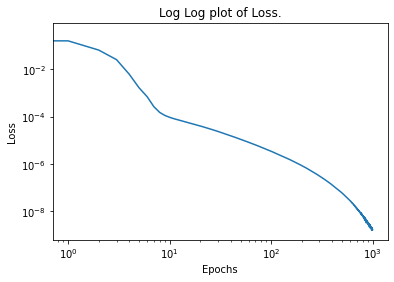

In [263]:
plt.loglog(history.history['loss'])
plt.title('Log Log plot of Loss.')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [252]:
pred = model.predict(X_test)

In [253]:
cor=0
wro = 0
for i in range(400):
    pred[i][pred[i]>=0.3]=1.0
    pred[i][pred[i]<0.3]=0.0  
    if False in (pred[i] == y_test[i]):     
        wro+=1     
    else:
        cor+=1

In [254]:
pred[i]

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0.], dtype=float32)

In [255]:
y_test[i]

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0.])

In [256]:
wro,cor

(0, 400)

In [257]:
wro,cor

(0, 400)